In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Bar and Count Plots

In [3]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


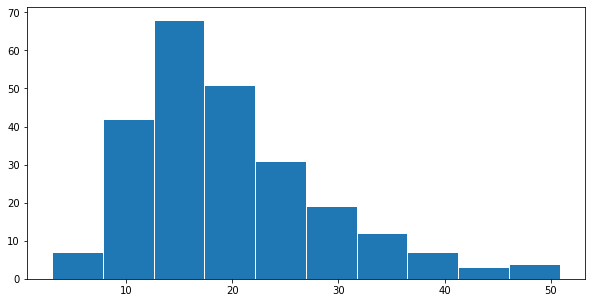

In [4]:
plt.figure(figsize=(10,5))
_ = plt.hist(tips_df['total_bill'], ec = 'white')

Text(0, 0.5, 'Frequency')

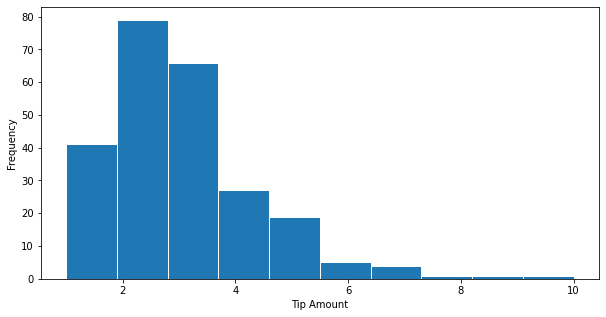

In [5]:
plt.figure(figsize=(10,5))
_ = plt.hist(tips_df['tip'], ec = 'white')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

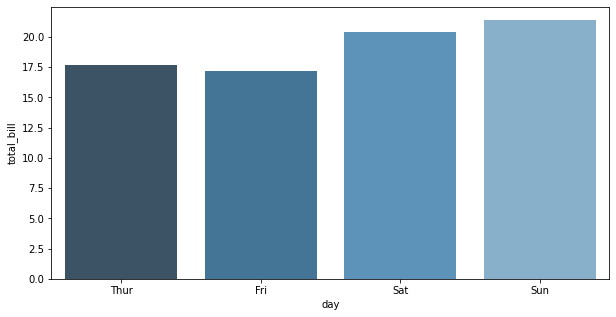

In [6]:
plt.figure(figsize=(10, 5))
_ = sns.barplot(x='day', y='total_bill', data=tips_df, ci = None, palette="Blues_d")

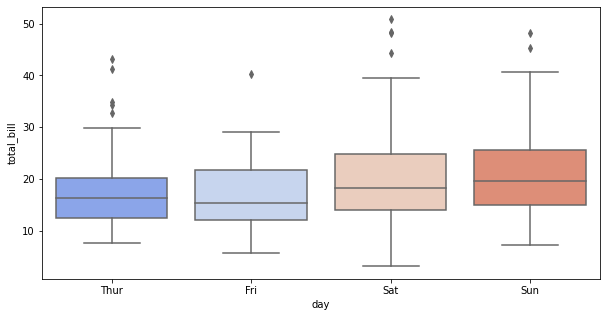

In [7]:
# Box plot

plt.figure(figsize=(10, 5))
_ = sns.boxplot(x='day',y='total_bill',data=tips_df, palette='coolwarm')

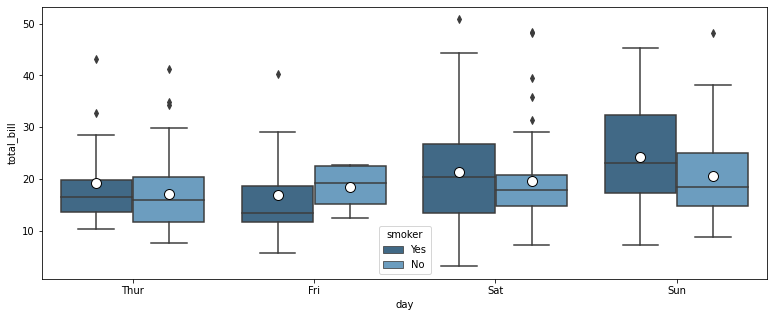

In [8]:
plt.figure(figsize=(13, 5))
_ = sns.boxplot(x="day",y="total_bill",hue="smoker",data=tips_df, palette="Blues_d", showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

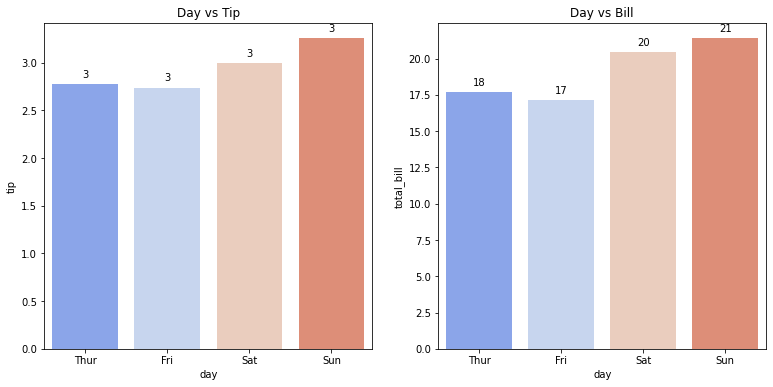

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Day vs Tip')
splot = sns.barplot(x=tips_df.day, y=tips_df.tip, palette=("coolwarm"), ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.subplot(1,3,2)
plt.title('Day vs Bill')
splot1 = sns.barplot(x=tips_df.day, y=tips_df.total_bill, palette=("coolwarm"), ci = None)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

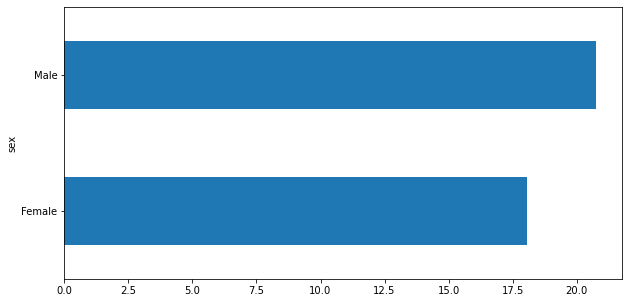

In [10]:
plt.figure(figsize=(10, 5))
_ = tips_df.groupby(["sex"]).mean()["total_bill"].sort_values().plot(kind='barh')

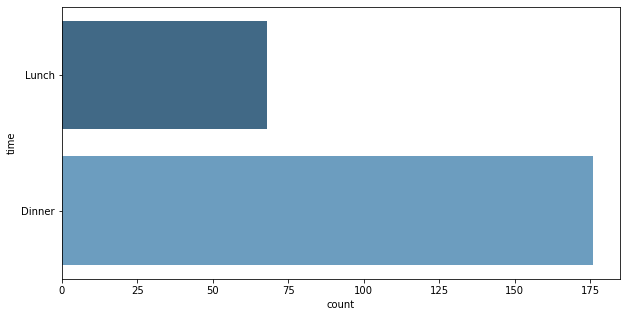

In [11]:
plt.figure(figsize=(10, 5))
_ = sns.countplot(y = "time", data = tips_df, palette = "Blues_d")

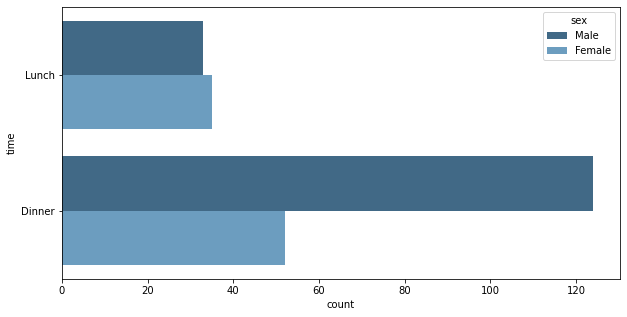

In [12]:
plt.figure(figsize=(10, 5))
_ = sns.countplot(y = "time", hue = "sex", data = tips_df, palette = "Blues_d")

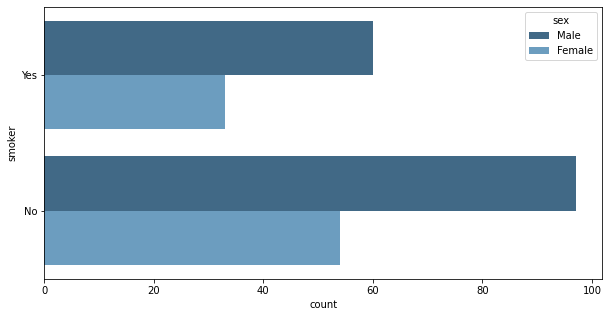

In [13]:
plt.figure(figsize=(10, 5))
_ = sns.countplot(y = "smoker", hue = "sex", data = tips_df, palette = "Blues_d")

### Scatter Plot

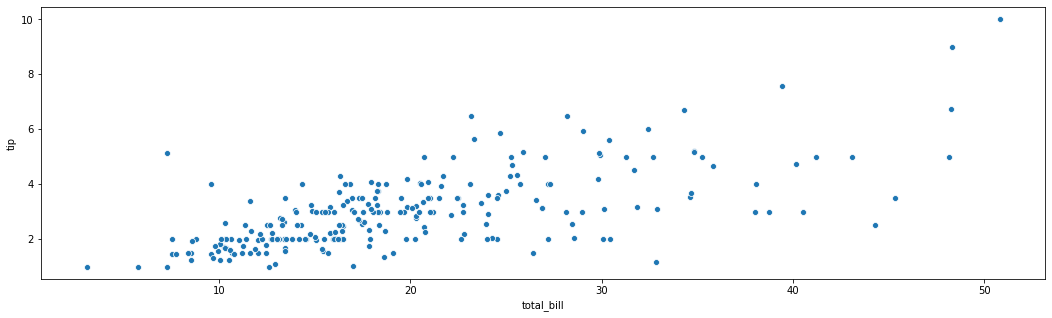

In [14]:
plt.figure(figsize=(18, 5))
_ = sns.scatterplot(data=tips_df, x="total_bill", y="tip")

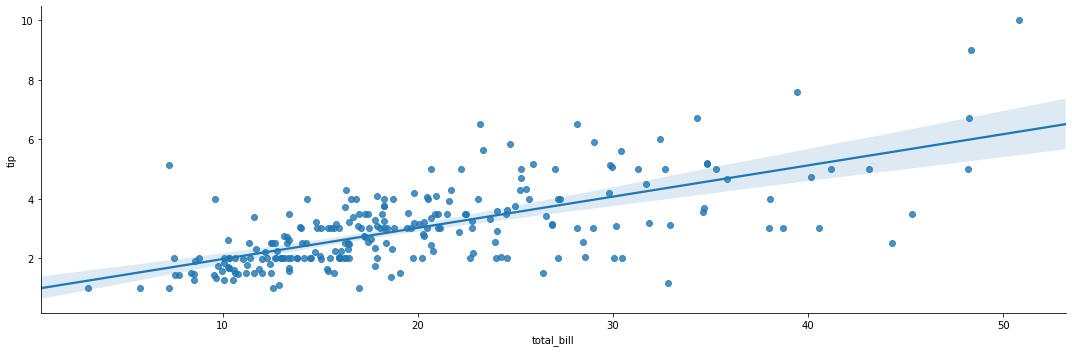

In [15]:
_ = sns.lmplot(x='total_bill', y='tip', data=tips_df, height=5, aspect=3) 

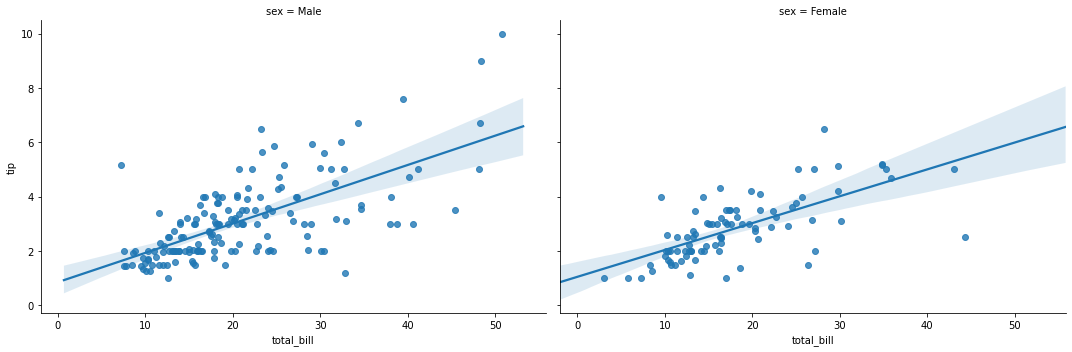

In [16]:
_ = sns.lmplot(x='total_bill', y='tip', data=tips_df, col='sex', palette='Set1', height=5, aspect=1.5)
plt.show()

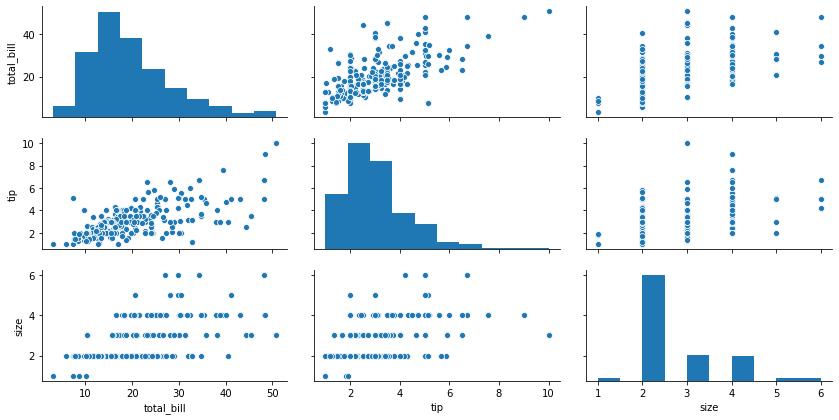

In [17]:
_ = sns.pairplot(tips_df, height=2, aspect=2)
plt.show()

### Timeseries Plot

In [18]:
df = pd.read_excel('**************************************\\COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [ ]:
# df.info()

In [19]:
import datetime

df['month_name'] = df['dateRep'].dt.strftime('%B-%Y')

In [20]:
df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,month_name
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,December-2020
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,December-2020


In [21]:
df_monthly = df.groupby('dateRep')['cases'].sum().reset_index()
df_monthly = df.set_index('dateRep')
df_monthly.index

DatetimeIndex(['2020-12-14', '2020-12-13', '2020-12-12', '2020-12-11',
               '2020-12-10', '2020-12-09', '2020-12-08', '2020-12-07',
               '2020-12-06', '2020-12-05',
               ...
               '2020-03-30', '2020-03-29', '2020-03-28', '2020-03-27',
               '2020-03-26', '2020-03-25', '2020-03-24', '2020-03-23',
               '2020-03-22', '2020-03-21'],
              dtype='datetime64[ns]', name='dateRep', length=61900, freq=None)

In [22]:
df_monthly = df_monthly['cases'].resample('M').sum() 

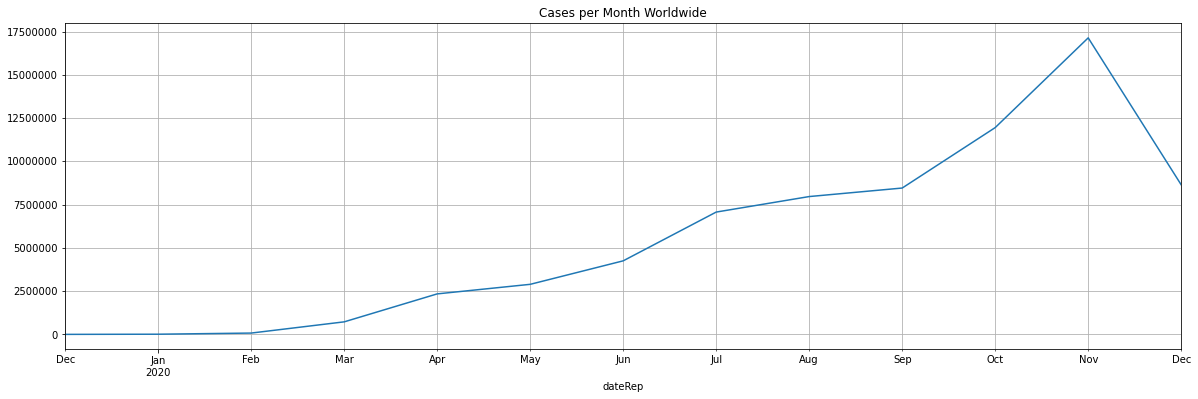

In [23]:
plt.ticklabel_format(style='plain')
plt.title("Cases per Month Worldwide")
df_monthly.plot(figsize=(20, 6))
plt.grid(True, which='both')
plt.show()

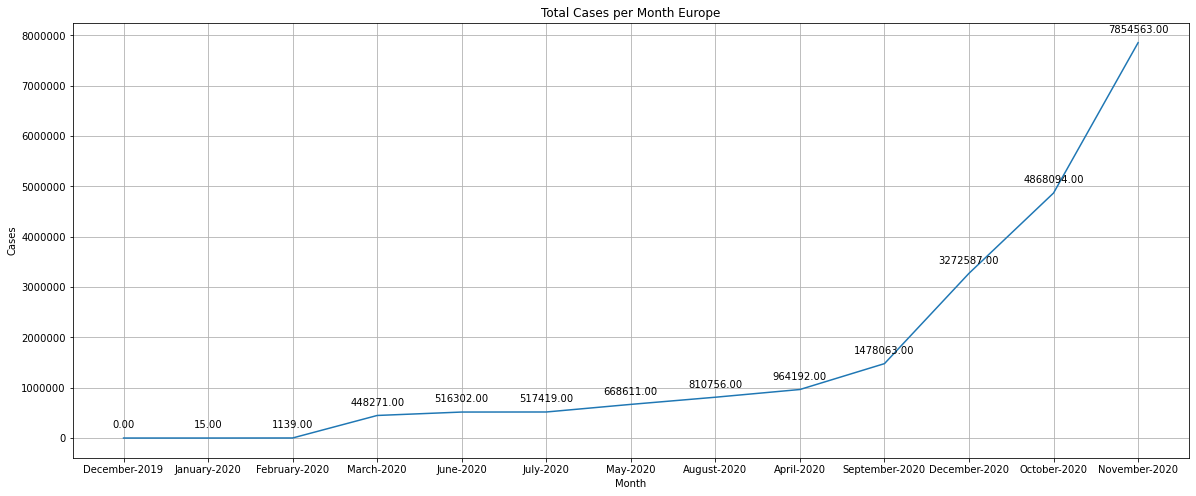

In [24]:
Europe = df.loc[df['continentExp'] == 'Europe']
Europe = Europe[['month_name', 'cases']]
Europe = Europe.groupby(['month_name'])['cases'].sum().reset_index()
Europe = Europe.sort_values('cases', ascending=True)

plt.figure(figsize=(20, 8))
plt.ticklabel_format(style='plain')
plt.plot(Europe.month_name, Europe.cases)
for a,b in zip(Europe.month_name, Europe.cases):
    label3 = "{:.2f}".format(b)
    plt.annotate(label3,
                 (a,b),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.title('Total Cases per Month Europe')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.grid(True, which='both')
plt.show()

In [25]:
Asia = df.loc[df['continentExp'] == 'Asia']
Asia = Asia[['month_name', 'cases']]
Asia = Asia.groupby(['month_name'])['cases'].sum().reset_index()

America = df.loc[df['continentExp'] == 'America']
America = America[['month_name', 'cases']]
America = America.groupby(['month_name'])['cases'].sum().reset_index()

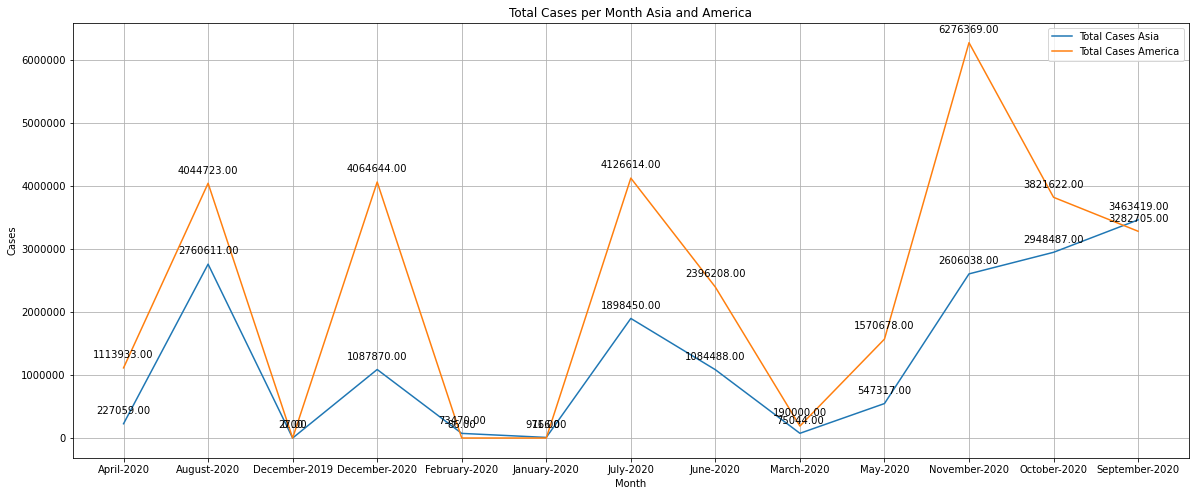

In [26]:
plt.figure(figsize=(20, 8))
plt.ticklabel_format(style='plain')
plt.plot(Asia.month_name, Asia.cases)
for a,b in zip(Asia.month_name, Asia.cases):
    label3 = "{:.2f}".format(b)
    plt.annotate(label3,
                 (a,b),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.plot(America.month_name, America.cases)
for a,b in zip(America.month_name, America.cases):
    label3 = "{:.2f}".format(b)
    plt.annotate(label3,
                 (a,b),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.title('Total Cases per Month Asia and America')
plt.legend(['Total Cases Asia','Total Cases America'])
plt.xlabel('Month')
plt.ylabel('Cases')
plt.grid(True, which='both')
plt.show()